### Instructions

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.special import inv_boxcox

import warnings
warnings.filterwarnings('ignore')

### 01 - Problem (case study)

We are looking at insurance data of a range of customers. The dataset contains both categorical and numerical data. It provides information on socioeconomical features of the customers as well as on their historic insurance behaviour. The goal is to predict the future total claim amount of each customer.

### 02 - Getting Data

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv', sep=",")
df.sample(2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3622,3622,CQ78705,NaN,7145.29959,NaN,Extended,College,2/9/11,Employed,F,...,3.0,8,Personal Auto,Personal L1,Offer3,Web,436.800000,Four-Door Car,Medsize,NaN
7295,7295,TP54769,California,5103.35758,No,Extended,Bachelor,2/27/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Web,398.190882,SUV,Medsize,NaN


### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [4]:
def preprocess_df(df):
    df.columns = [col_name.lower().replace(' ', '_') for col_name in df.columns]
    df = df.rename(columns={'employmentstatus':'employment_status'})
    df = df.drop(['unnamed:_0'], axis=1)
    df = df.fillna({'state': 'no data', 'response': 'No'})
    df = df.dropna(subset=['months_since_last_claim','number_of_open_complaints','vehicle_class', 'vehicle_size', 'vehicle_type'])
    df.duplicated(subset = None, keep = 'first')
    return df

df = preprocess_df(df)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
5,HO81102,no data,4745.181764,No,Basic,High School or Below,2/14/11,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A


Checking categorical and numerical features.

In [5]:
nums = df.select_dtypes(include=[np.number])
cats = df.select_dtypes(include=[np.object])

Exploring the data.

Checking normality of numerical data.

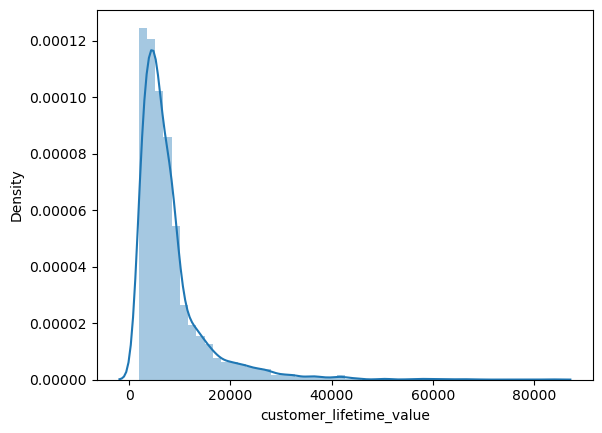

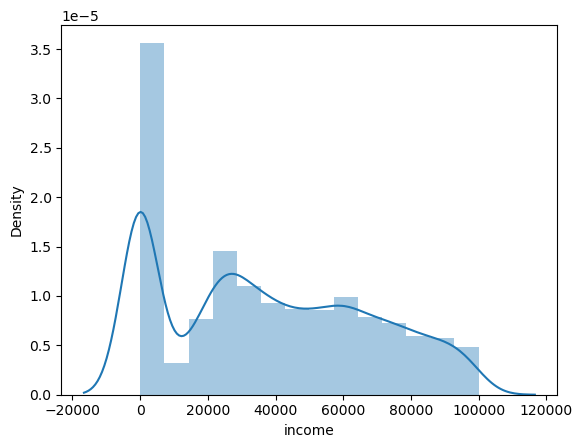

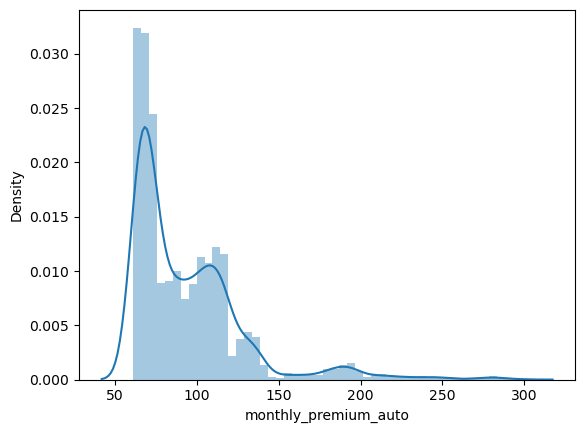

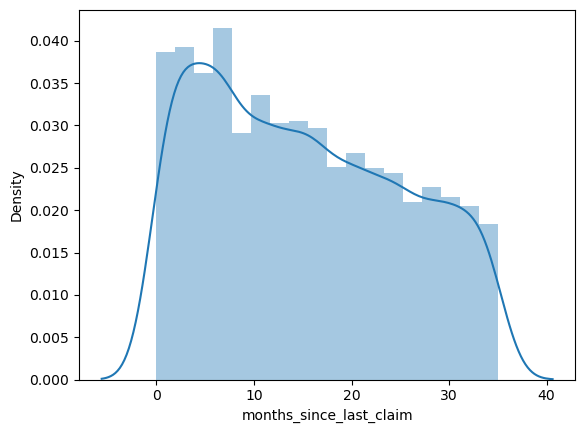

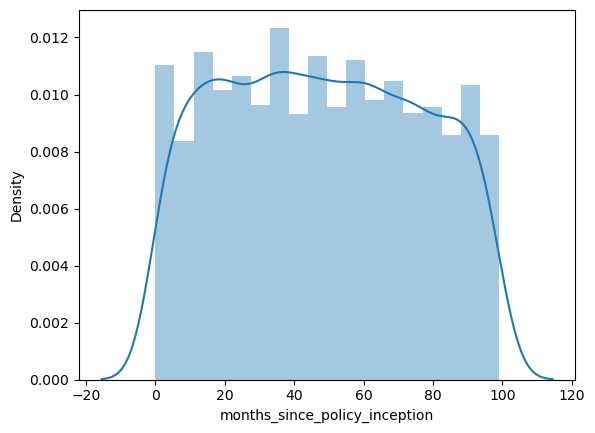

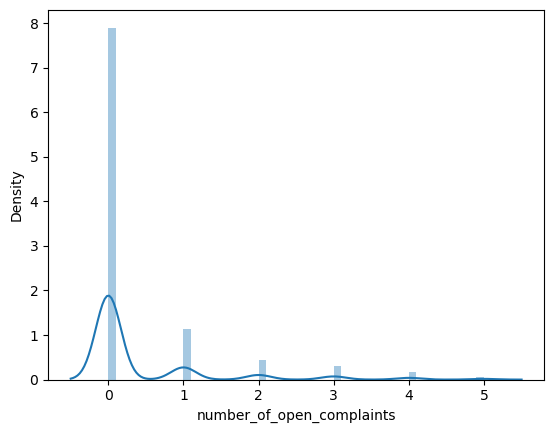

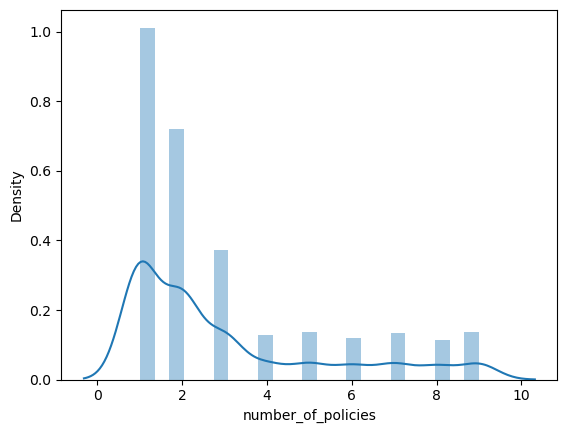

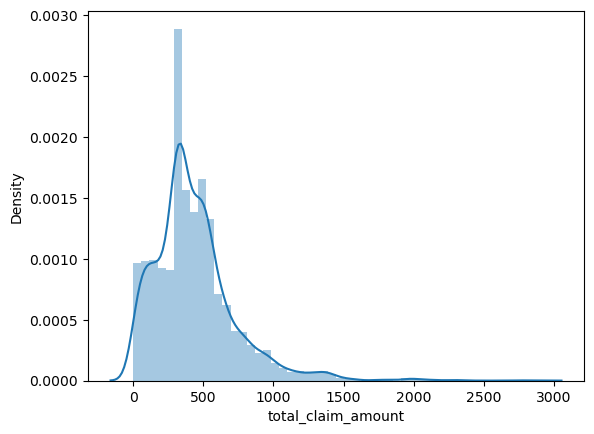

In [6]:
for column in nums.columns:
    sns.distplot(df[column])
    plt.show()

The distribution of the 'customer_lifetime_value', 'income', 'monthly_premium_auto', and 'total_claim_amount' variables appear to be somewhat bell-shaped and symmetric, which could indicate a normal distribution.

Checking correlations of numerical data.

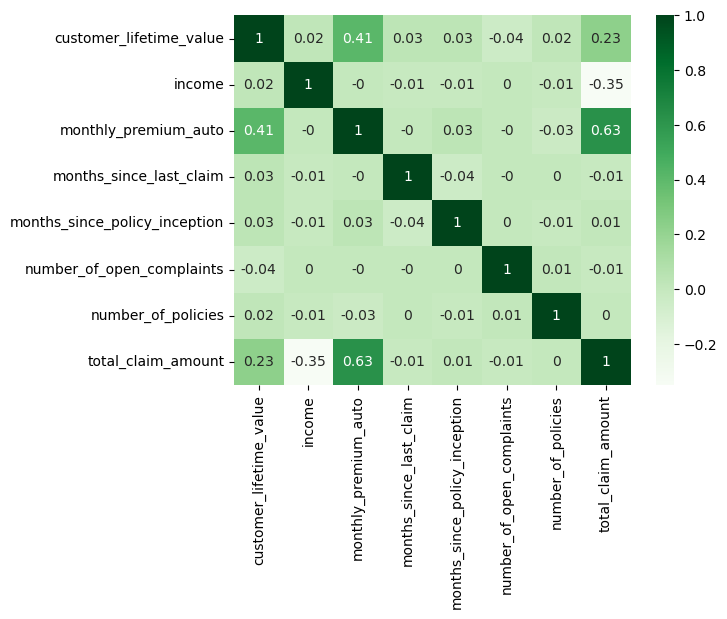

In [7]:
corr_nums = nums.corr()
corr_nums = round(corr_nums,2)
sns.heatmap(corr_nums, cmap="Greens", annot=True)
plt.show()

In [8]:
nums.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1, inplace=True)


Checking the categorical columns.

In [9]:
cats.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

Checking all columns for their categories, and dropping the column from the dataset if there are too many or only one category. Also dropping the columns that I had added for visualization. I also drop the columns that don't influence the target much, to my understanding. Or a represented already (partly) by another variable, in this case by "income", which has a good correlation with the target.

In [10]:
cats.vehicle_type.unique()

array(['A'], dtype=object)

In [11]:
cats = cats.drop(['customer', 'state', 'education',
       'effective_to_date', 'location_code',
       'marital_status', 'policy',
       'sales_channel', 'vehicle_type'  ], axis=1)

In [12]:
cats.columns

Index(['response', 'coverage', 'employment_status', 'gender', 'policy_type',
       'renew_offer_type', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
df_clean = pd.concat([cats, nums], axis=1)
df_clean.sample(5)

,response,coverage,employment_status,gender,policy_type,renew_offer_type,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
419,Yes,Extended,Employed,F,Personal Auto,Offer1,Luxury Car,Small,25807.063000,71210,214,1027.200000
1630,No,Extended,Employed,F,Personal Auto,Offer3,Four-Door Car,Medsize,3703.437656,23120,93,446.400000
3477,No,Extended,Employed,F,Personal Auto,Offer2,Four-Door Car,Medsize,10546.655450,43922,88,108.701381
3075,No,Premium,Employed,M,Personal Auto,Offer4,Four-Door Car,Medsize,4115.577437,52405,103,494.400000
1037,No,Basic,Employed,M,Corporate Auto,Offer2,Four-Door Car,Medsize,5924.667902,78387,74,204.090644


### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

In [14]:
df = df_clean

In [15]:
summary = df.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,4815.0,8023.0,6926.0,1904.0,4038.0,5838.0,8937.0,83325.0,4898.0
income,4815.0,37635.0,30190.0,0.0,0.0,34516.0,61576.0,99961.0,61576.0
monthly_premium_auto,4815.0,94.0,35.0,61.0,69.0,83.0,110.0,298.0,41.0
total_claim_amount,4815.0,434.0,294.0,0.0,259.0,381.0,548.0,2893.0,289.0


Dealing with outliers and normalizing the data.

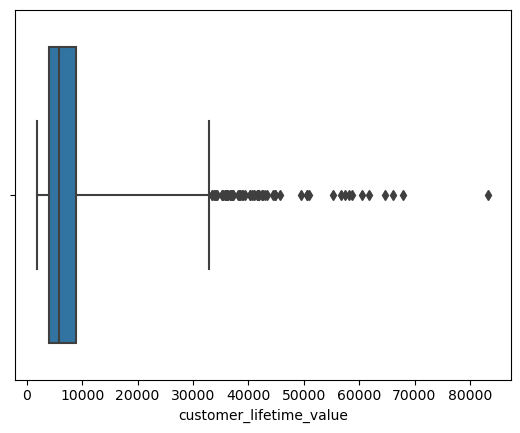

In [16]:
sns.boxplot(x='customer_lifetime_value', data=df, whis=5)
plt.show()

In [17]:
def remove_outliers(df_trans, z_thresh=3, in_columns=None, skip_columns=[]):
    if in_columns is None:
        in_columns = df_trans.select_dtypes(np.number).columns
    for column in in_columns:
        if column not in skip_columns:
            z_scores = stats.zscore(df_trans[column])
            df_trans = df_trans[(abs(z_scores) < z_thresh)]
    return df_trans

# apply Box-Cox transformation to a copy of the original DataFrame
df_trans = df.copy()
numeric_cols = df_trans.select_dtypes(np.number).columns
_ci = {}  # initialize a dictionary to store the lambda values for each column (so I can invert the transformation later)
for column in numeric_cols:
    # since i know any columns should take negative numbers, to avoid -inf in df_trans
    df_trans[column] = np.where(df_trans[column] <= 0, np.NaN, df_trans[column]) 
    df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
    transformed_data, ci = stats.boxcox(df_trans[column])
    df_trans[column] = transformed_data
    _ci[column] = ci  # store the lambda value for this column

# remove outliers from the transformed DataFrame
df_trans = remove_outliers(df_trans)

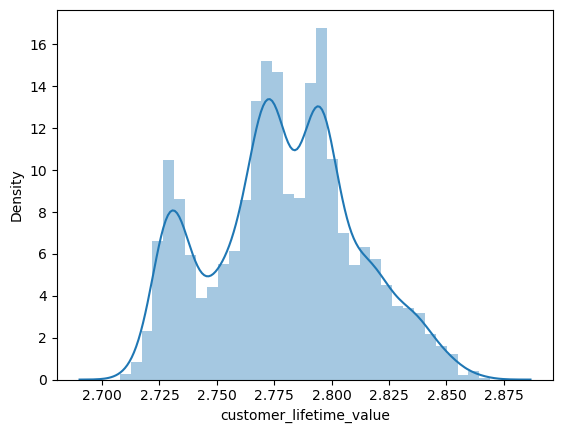

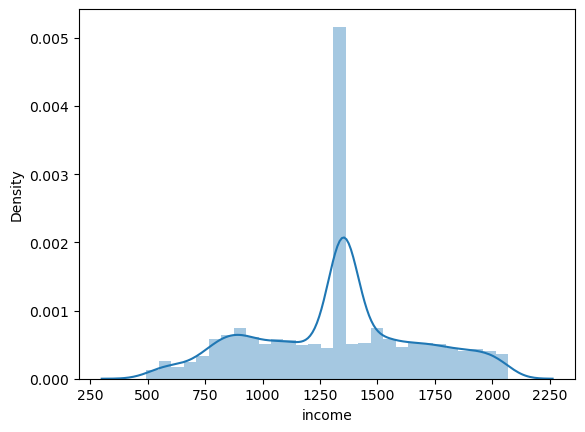

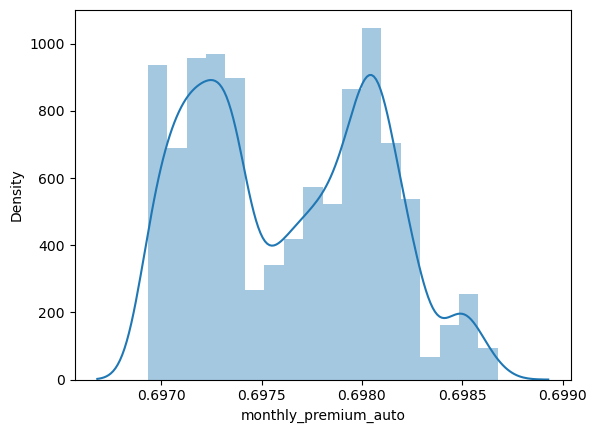

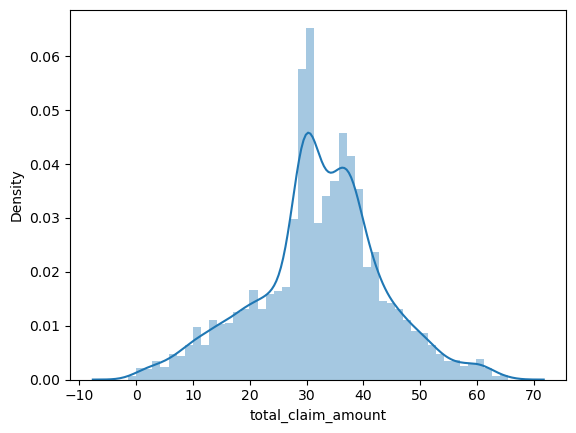

In [18]:
for column in df_trans.select_dtypes(np.number).columns:
    sns.distplot(df_trans[column])
    plt.show()

In [19]:
summary = df_trans.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,4790.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,0.0
income,4790.0,1324.0,352.0,494.0,1074.0,1352.0,1532.0,2068.0,459.0
monthly_premium_auto,4790.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
total_claim_amount,4790.0,32.0,11.0,-1.0,27.0,32.0,39.0,66.0,12.0


In [20]:
df = df_trans

Encoding the categoricals.

In [21]:
nums = df.select_dtypes(include = np.number)
cats = df.select_dtypes(include = np.object)

In [22]:
cats_dumm = pd.get_dummies(cats, drop_first=True)
cats_dumm

,response_Yes,coverage_Extended,coverage_Premium,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
10,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
13,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
10903,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0
10904,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
10906,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [23]:
df_final = pd.concat([cats_dumm, nums], axis=1)
df_final.sample(5)

,response_Yes,coverage_Extended,coverage_Premium,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,policy_type_Personal Auto,policy_type_Special Auto,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
8728,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2.741909,1724.840341,0.697510,25.495717
7840,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,2.774860,1224.901603,0.697247,30.141024
7501,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,2.762723,887.216095,0.698074,38.588576
3608,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,2.792603,1479.315097,0.697892,30.901441
7851,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,2.797852,1351.731940,0.697484,37.398158


Performing X/y-split.

In [24]:
y = df_final["total_claim_amount"]
X = df_final.drop(['total_claim_amount'],axis=1)
X.head()

,response_Yes,coverage_Extended,coverage_Premium,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,policy_type_Personal Auto,policy_type_Special Auto,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,monthly_premium_auto
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,2.820167,808.942658,0.697920
3,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,2.834282,1328.271521,0.697877
5,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,2.767328,1352.924643,0.696932
10,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,2.771871,1838.569556,0.698198
13,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,1,0,2.774901,1602.362375,0.697247


Applying Train/test-split.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 05 - Modeling
Apply model.

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
predictions = model.predict(X_test)
predictions

array([43.13079833, 31.98141961, 25.02376229, ..., 33.03342758,
       33.95977239, 35.51815611])

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [28]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

R2 =  0.42510965347933294
RMSE =  8.613516863175084
MSE =  74.19267275220155
MAE =  6.425715170517194


In [29]:
np.max(y)

65.55731310101017

Inverting the boxcox transformation

In [30]:
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [31]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

R2 =  -1275.0456641426458
RMSE =  405.8084709254875
MSE =  164680.51507488222
MAE =  366.14994242349616


I don't understand why R2 is negative after inversion...I researched but couldn't find an answer.

In [33]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results.sort_values('diff', ascending=False).head(50)
results

,true,pred,diff
1294,1284.093173,679.823706,604.269467
2107,12.252847,371.645317,359.392470
3901,225.641724,228.344109,2.702385
1650,75.110004,293.097586,217.987582
4295,1193.036154,647.946609,545.089545
...,...,...,...
8898,345.600000,435.137162,89.537162
6644,446.400000,475.120070,28.720070
4778,391.636628,396.548468,4.911840
6791,507.799325,419.189314,88.610011
